<a href="https://colab.research.google.com/github/ykitaguchi77/MRI_segmentation/blob/main/Analyze_MRI_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analyze MRI images**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
image_path = "/content/drive/MyDrive/Deep_learning/MRI_segmentation/OutputImage/SE00002/IM00008.jpg"

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
# 画像を開く
img = Image.open(image_path)

# 画像をグレースケールに変換
img_gray = img.convert('L')

# 画像をmatplotlibで白黒表示
plt.imshow(img_gray, cmap='gray')
plt.axis('off')  # 軸を非表示にする
plt.show()

In [ ]:
# 画像のサイズを表示
print("画像のサイズ：", img.size)

# 切り抜く範囲を指定（左、上、右、下）
left = 250
top = 150
right = 500
bottom = 300

# 画像を切り抜く
img_cropped = img.crop((left, top, right, bottom))

# 画像をグレースケールに変換
img_gray = img_cropped.convert('L')

# 画像をmatplotlibで白黒表示
plt.imshow(img_gray, cmap='gray')
plt.axis('off')  # 軸を非表示にする
plt.show()

In [ ]:
# 画像を表示
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

# ヒストグラムを表示
plt.subplot(1, 2, 2)
plt.hist(img_gray.getdata(), bins=256, range=(0, 255), color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 画像ファイルのパス
image_path = "/content/drive/MyDrive/Deep_learning/MRI_segmentation/OutputImage/SE00002/IM00008.jpg"

# 画像を開く
img = Image.open(image_path)

# 画像をグレースケールに変換
img_gray = img.convert('L')

# 画像をnumpy arrayに変換
img_array = np.array(img_gray)

# 指定するピクセル強度の範囲
lower_intensity = 50
upper_intensity = 80

# 指定した範囲内のピクセルをマスク
mask = np.logical_and(img_array >= lower_intensity, img_array <= upper_intensity)

# カラー画像に変換
img_color = img.convert('RGB')
img_color_array = np.array(img_color)

# マスクに対応する部分を赤色でオーバーレイ
img_color_array[mask] = [255, 0, 0]  # RGB値で赤色を指定

# 画像を表示
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(img_color_array)
plt.axis('off')
plt.title(f'Intensity Range: {lower_intensity}-{upper_intensity}')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 画像ファイルのパス
image_path = "/content/drive/MyDrive/Deep_learning/MRI_segmentation/OutputImage/SE00002/IM00008.jpg"

# 画像を開く
img = Image.open(image_path)

# 切り抜く範囲を指定（左、上、右、下）
left = 250
top = 150
right = 500
bottom = 300

# 画像を切り抜く
img_cropped = img.crop((left, top, right, bottom))

# 画像をグレースケールに変換
img_gray = img_cropped.convert('L')

# 画像をnumpy arrayに変換
img_array = np.array(img_gray)

# ヒストグラムの計算
histogram, bins = np.histogram(img_array, bins=256, range=(0, 255))

# 移動平均を使ってヒストグラムを平滑化
window_size = 10
histogram_smooth = np.convolve(histogram, np.ones(window_size) / window_size, mode='same')

# 平滑化されたヒストグラムの傾きを計算
gradient = np.gradient(histogram_smooth)

# 傾きが正から負に変わる点を見つける
peak_indexes = np.where(np.diff(np.sign(gradient)) < 0)[0]

# 最初のピークとその周辺の範囲を特定
peak_index = peak_indexes[0]
lower_intensity = bins[peak_index]
upper_intensity = bins[peak_indexes[1]] if len(peak_indexes) > 1 else lower_intensity + 30

# 指定した範囲内のピクセル数を計算
mask = np.logical_and(bins[:-1] >= lower_intensity, bins[:-1] <= upper_intensity)
pixel_count = np.sum(histogram[mask])

print(f"Pixel intensity range: {lower_intensity}-{upper_intensity}")
print(f"Pixel count: {pixel_count}")

# 切り抜いた画像、ヒストグラム、平滑化したヒストグラム、傾き、選択されたピークを表示
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.imshow(img_gray, cmap='gray')
ax1.set_title('Cropped Image')
ax1.axis('off')

ax2.plot(bins[:-1], histogram, color='black', label='Original')
ax2.plot(bins[:-1], histogram_smooth, color='blue', label='Smoothed')
ax2.plot(bins[:-1], gradient, color='green', label='Gradient')
ax2.fill_between(bins[:-1], histogram, where=mask, color='red', alpha=0.5)
ax2.plot(bins[peak_indexes], histogram_smooth[peak_indexes], 'o', color='red', label='Peaks')
ax2.set_xlabel('Pixel Intensity')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram')
ax2.legend()

plt.tight_layout()
plt.show()

Pixel intensity range: 47.75390625-77.75390625
Pixel count: 5960


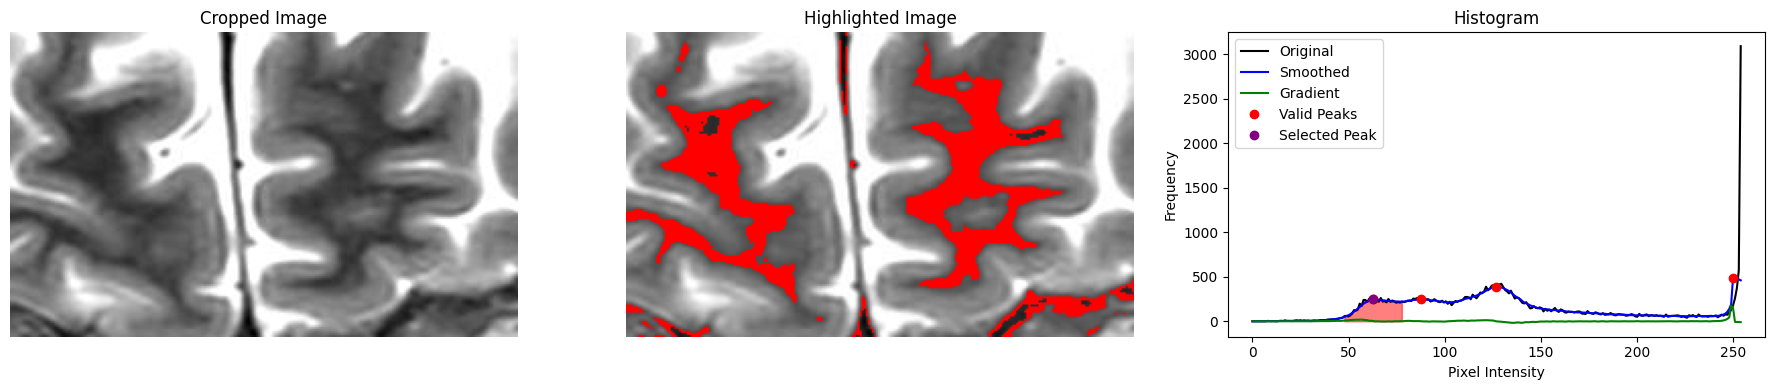

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 画像ファイルのパス
image_path = "/content/drive/MyDrive/Deep_learning/MRI_segmentation/OutputImage/SE00002/IM00008.jpg"

# 画像を開く
img = Image.open(image_path)

# 切り抜く範囲を指定（左、上、右、下）
left = 250
top = 150
right = 500
bottom = 300

# 画像を切り抜く
img_cropped = img.crop((left, top, right, bottom))

# 画像をグレースケールに変換
img_gray = img_cropped.convert('L')

# 画像をnumpy arrayに変換
img_array = np.array(img_gray)

# ヒストグラムの計算
histogram, bins = np.histogram(img_array, bins=256, range=(0, 255))

# 移動平均を使ってヒストグラムを平滑化
window_size = 10
histogram_smooth = np.convolve(histogram, np.ones(window_size) / window_size, mode='same')

# 平滑化されたヒストグラムの傾きを計算
gradient = np.gradient(histogram_smooth)

# 傾きが正から負に変わる点を見つける
peak_indexes = np.where(np.diff(np.sign(gradient)) < 0)[0]

# ピークの高さが平滑化されたヒストグラムの最大値の20％以上であるピークを選択
peak_heights = histogram_smooth[peak_indexes]
valid_peak_indexes = peak_indexes[peak_heights >= 0.2 * np.max(histogram_smooth)]

if len(valid_peak_indexes) > 0:
    # 最初の有効なピークを選択
    peak_index = valid_peak_indexes[0]

    # ピークを中心に±15の範囲を選択
    lower_intensity = max(0, bins[peak_index] - 15)
    upper_intensity = min(255, bins[peak_index] + 15)

    # 指定した範囲内のピクセル数を計算
    mask = np.logical_and(bins[:-1] >= lower_intensity, bins[:-1] <= upper_intensity)
    pixel_count = np.sum(histogram[mask])

    print(f"Pixel intensity range: {lower_intensity}-{upper_intensity}")
    print(f"Pixel count: {pixel_count}")

    # 指定した範囲内のピクセルを強調表示
    img_array_color = np.array(img_cropped.convert('RGB'))
    img_array_color[(img_array >= lower_intensity) & (img_array <= upper_intensity)] = [255, 0, 0]
    img_highlighted = Image.fromarray(img_array_color)
else:
    print("No valid peaks found.")
    img_highlighted = img_cropped.convert('RGB')

# 切り抜いた画像、ヒストグラム、平滑化したヒストグラム、傾き、選択されたピークを表示
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

ax1.imshow(img_gray, cmap='gray')
ax1.set_title('Cropped Image')
ax1.axis('off')

ax2.imshow(img_highlighted)
ax2.set_title('Highlighted Image')
ax2.axis('off')

ax3.plot(bins[:-1], histogram, color='black', label='Original')
ax3.plot(bins[:-1], histogram_smooth, color='blue', label='Smoothed')
ax3.plot(bins[:-1], gradient, color='green', label='Gradient')
ax3.fill_between(bins[:-1], histogram, where=mask, color='red', alpha=0.5)

if len(valid_peak_indexes) > 0:
    ax3.plot(bins[valid_peak_indexes], histogram_smooth[valid_peak_indexes], 'o', color='red', label='Valid Peaks')
    ax3.plot(bins[peak_index], histogram_smooth[peak_index], 'o', color='purple', label='Selected Peak')

ax3.set_xlabel('Pixel Intensity')
ax3.set_ylabel('Frequency')
ax3.set_title('Histogram')
ax3.legend()

plt.tight_layout()
plt.show()